In [64]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
# carregamento de dados e metadados
data = pd.read_csv('gds5473.csv',sep=',', index_col = 0)
meta = pd.read_csv('meta-gds5473.csv',sep=',', index_col = 0)

In [7]:
# verificaçao colunas e linhas de dados e metadados
print(data.values.shape)
print(meta.values.shape)

(48107, 48)
(48, 4)


**Análise de dados e metadados**

Verifica-se que os dados são compostos por 48107 linhas e 48 colunas.
Por outro lado, os metadados são compostos por 48 linhas e 4 colunas.

**Descrição e caracterização do dataset**

O objetivo deste estudo era investigar os efeitos de um jejum curto na homeostase e na energia do músculo esquelético. Neste estudo foram colecionadas biopsias do músculo esquelético e análisadas emquatro situações diferentes: 1.5, 4, 10 e 24 horas após a refeição.

Assim, pretende-se relacionar o valor total de RNA obtido com o jejum.

Como se pode verificar, existem até 48107 genes que serão analisados e que, consequentemente, possam ter uma influencia para o estudo. No entanto (e como se verificará mais à frente), pode não se verificar o resgisto de determinados genes (valores nulos).

Quanto aos metadados, verifica-se que possuem 4 variaveis: a amostra, o indivíduo, a hora de recolha e a descrição

In [10]:
# verificaçao do tipo de atributos nos dados
print("Tipos de atributos (dados):")
dataframe=pd.DataFrame(data=data)
datat=dataframe.transpose()
print(datat.dtypes)


Tipos de atributos (dados):
ILMN_1343048    float64
ILMN_1343049    float64
ILMN_1343050    float64
ILMN_1343052    float64
ILMN_1343059    float64
                 ...   
ILMN_3311170    float64
ILMN_3311175    float64
ILMN_3311180    float64
ILMN_3311185    float64
ILMN_3311190    float64
Length: 48107, dtype: object


In [18]:
# valores em falta nos dados 
print("Valores em falta para cada atributo dos dados:")
print(datat.isnull().sum())
print("")
print("Total de valores em falta para cada atributo dos dados:")
print(datat.isnull().sum().sum())

Valores em falta para cada atributo dos dados:
ILMN_1343048    48
ILMN_1343049    48
ILMN_1343050    48
ILMN_1343052    48
ILMN_1343059    48
                ..
ILMN_3311170     0
ILMN_3311175     0
ILMN_3311180     0
ILMN_3311185     0
ILMN_3311190     0
Length: 48107, dtype: int64

Total de valores em falta para cada atributo dos dados:
37632


In [33]:
# verificaçao do tipo de atributos nos metadados
print("Tipos de atributos (metadados):")
print(meta.dtypes)

Tipos de atributos (metadados):
sample         object
individual     object
time           object
description    object
dtype: object


In [19]:
# valores em falta nos metadados 
print("Valores em falta para cada atributo dos metadados:")
print(meta.isnull().sum())
print("")
print("Total de valores em falta para cada atributo dos metadados:")
print(meta.isnull().sum().sum())

Valores em falta para cada atributo dos metadados:
sample         0
individual     0
time           0
description    0
dtype: int64

Total de valores em falta para cada atributo dos metadados:
0


**Características dos dados e metadados**

Dados:
Os atributos dos dados são os diferentes tipos de gene (como por exemplo: ILMN_1343048, ILMN_1343049). Há 48107 atributos e são do tipo *float64*.

Metadados: 
Os atributos dos metadados são a amostra, o índividuo, o tempo após a refeição e a descrição. Estes atributos são do tipo *object*.

In [35]:
#pre-processamento dos dados
data=data.dropna() #dropna() remove as linhas que contêm valores nulos
datap = preprocessing.scale(data)
print(len(datap))


47323


**Passos do pré-processamento**

Primeiro, eliminaram-se os valores nulos com a função dropna(). Seguidamente, procedeu-se à normalização dos dados com o algoritmo preprocessing.scale().

Note-se que, após o pré-processamento dos dados, restam 47323 genes para análise.

**Escolha de variáveis de meta-dados**

Uma vez que os meta-dados possuem quatro variáveis ("sample", "individual", "time", "description"), apenas serão utilizadas duas: "individual" e "time". As variáveis "sample" e "description" não foram consideradas uma vez que não possuem informação relevante para a análise dos dados (como cluster, aprendizagem máquina, etc).

[9.77179240e-01 3.80320986e-03 1.92517236e-03 1.69185183e-03
 1.00559430e-03 9.00433434e-04 8.61345557e-04 7.01968542e-04
 6.52177592e-04 5.81417699e-04 5.65356475e-04 5.27012115e-04
 4.71944762e-04 4.48263215e-04 4.37231612e-04 4.22286150e-04
 3.88064685e-04 3.75646303e-04 3.32131073e-04 3.22860158e-04
 2.99425468e-04 2.88736333e-04 2.81718028e-04 2.68043152e-04
 2.60209498e-04 2.58384794e-04 2.54438159e-04 2.44206465e-04
 2.42655498e-04 2.38945434e-04 2.34569444e-04 2.32055298e-04
 2.30036729e-04 2.27181034e-04 2.25759799e-04 2.22227050e-04
 2.18819472e-04 2.13590426e-04 2.08966657e-04 2.07525165e-04
 2.03712465e-04 2.02660463e-04 1.98314784e-04 1.97368152e-04
 1.96062840e-04 1.90257236e-04 1.86460400e-04 1.74462353e-04]
0.9903947794460215


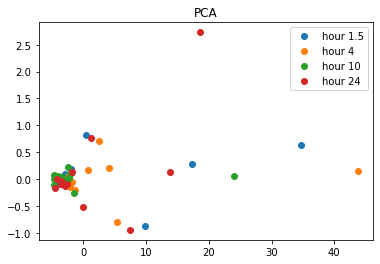

In [148]:
n=48                             #existem 48 amostras para proceder à análise
pca = PCA(n_components=n)
pca.fit(datap)                   # media e desvio
x_reduced = pca.transform(datap) # escala

print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:12]))                          # 99% da variabilidade

index_samples=[]
for hora in meta.time.unique():
    l=[]
    for i in range(0,48):
        if meta.time[i]==hora:
            l.append(i)
    index_samples.append(l)                               #criaçao de lista de index de 0 a 48, agrupados em listas correspondentes as diferentes horas

i=0

for hora in meta.time.unique():
    for i in range(0,len(index_samples)):
        if meta.time[i]==hora:
            plt.plot(x_reduced[index_samples[i],0],x_reduced[index_samples[i],1], 'o' , label=hora)
    i=i+1

plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show()
